#Deep Learning for Natural Language Processing
##Chapter 9 Transfomers

###Listing 9.1 Positional encoding

In [6]:
import sys
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
dimension=4
max_len=10
pos_enc=np.zeros(shape=(max_len,dimension))
print(pos_enc)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
for pos in range(max_len):
  i=0
  while (i<=dimension-2):
    x = pos/(10000**(2.0*i/dimension))
    #print(x)
    pos_enc[pos][i] = sin(x)
    pos_enc[pos][i+1] = cos(x)
    i+=2
print(pos_enc)

0.0
0.0
1.0
0.0001
2.0
0.0002
3.0
0.0003
4.0
0.0004
5.0
0.0005
6.0
0.0006
7.0
0.0007
8.0
0.0008
9.0
0.0009
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  9.99999998e-05  9.99999995e-01]
 [ 9.09297427e-01 -4.16146837e-01  1.99999999e-04  9.99999980e-01]
 [ 1.41120008e-01 -9.89992497e-01  2.99999995e-04  9.99999955e-01]
 [-7.56802495e-01 -6.53643621e-01  3.99999989e-04  9.99999920e-01]
 [-9.58924275e-01  2.83662185e-01  4.99999979e-04  9.99999875e-01]
 [-2.79415498e-01  9.60170287e-01  5.99999964e-04  9.99999820e-01]
 [ 6.56986599e-01  7.53902254e-01  6.99999943e-04  9.99999755e-01]
 [ 9.89358247e-01 -1.45500034e-01  7.99999915e-04  9.99999680e-01]
 [ 4.12118485e-01 -9.11130262e-01  8.99999879e-04  9.99999595e-01]]


In [8]:
x=range(dimension)
y=range(max_len)
x, y = np.meshgrid(x,y)

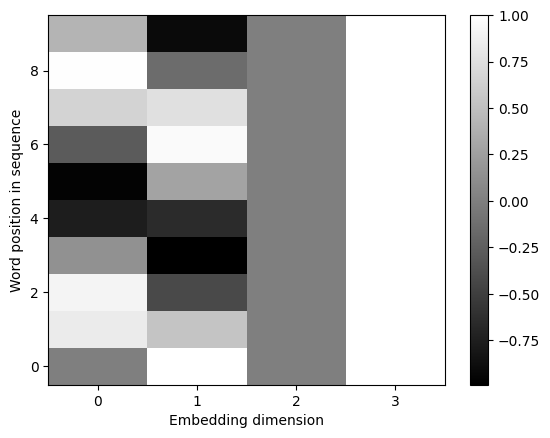

In [9]:
plt.xticks(range(dimension))
plt.pcolormesh(x, y, pos_enc ,cmap=cm.gray)
plt.colorbar()
plt.xlabel('Embedding dimension')
plt.ylabel('Word position in sequence')
plt.show()

###9.2 Masking

In [1]:
def mask_tokens(tokens, vocab):
  masked_tokens=tokens
  predictions=[]
  size=int(0.15 * len(tokens))
  tokens_indices=enumerate(tokens)
  dictionary=dict(tokens_indices)
  sample_tokens=np.random.choice(len(tokens),
    size=size, replace=False)
  for token in sample_tokens:
    if random.random() < 0.8:
      mask = '[MASK]'
    else:
      if random.random() < 0.5:
        mask = tokens[token]
      else:
        mask = random.randint(0, len(vocab) - 1)
    masked_tokens[dictionary[token]] = mask
    predictions.append(
      (token, masked_tokens[token]))
  return masked_tokens, predictions